In [1]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
df = pd.read_csv('mtcars.csv')
df = df.set_index('model')  ## As because each data is for unique model.

In [3]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
# split the dependent and independent variable
X = df.drop("mpg",1)   #Feature Matrix
y = df["mpg"]          #Target Variable
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## Feature Selection

In [5]:
![image.png](attachment:image.png)

'[image.png]' is not recognized as an internal or external command,
operable program or batch file.


## 1.Using Pearson Correlation

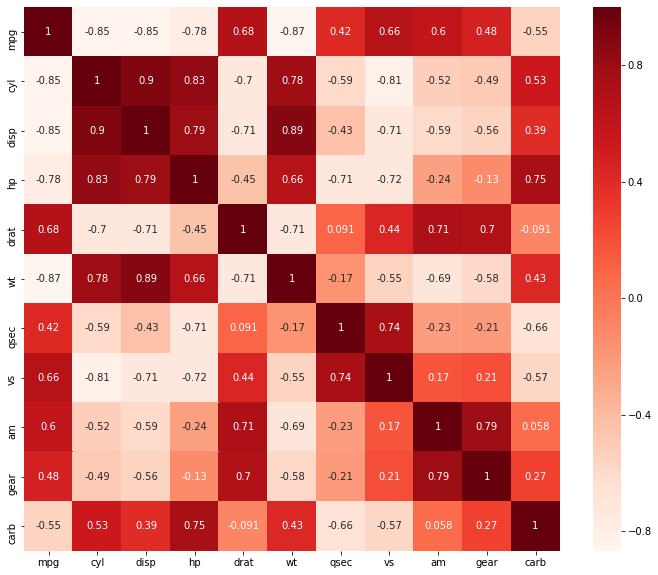

In [6]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [7]:
#Correlation with output variable
cor_target = abs(cor["mpg"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

mpg     1.000000
cyl     0.852162
disp    0.847551
hp      0.776168
drat    0.681172
wt      0.867659
vs      0.664039
am      0.599832
carb    0.550925
Name: mpg, dtype: float64

In [8]:
# condition check for Multicollinearity
print(df[["cyl","disp"]].corr())

           cyl      disp
cyl   1.000000  0.902033
disp  0.902033  1.000000


In [9]:
# condition check for Multicollinearity
print(df[["cyl","hp"]].corr())

          cyl        hp
cyl  1.000000  0.832447
hp   0.832447  1.000000


In [10]:
# condition check for Multicollinearity
print(df[["cyl","drat"]].corr())

           cyl      drat
cyl   1.000000 -0.699938
drat -0.699938  1.000000


In [11]:
# condition check for Multicollinearity
print(df[["cyl","wt"]].corr())

          cyl        wt
cyl  1.000000  0.782496
wt   0.782496  1.000000


## 2.Wrapper method

In [12]:
![image.png](attachment:image.png)

'[image.png]' is not recognized as an internal or external command,
operable program or batch file.


### 2.1. Backward elimination

In [13]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

C:\Users\user\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const    0.518124
cyl      0.916087
disp     0.463489
hp       0.334955
drat     0.635278
wt       0.063252
qsec     0.273941
vs       0.881423
am       0.233990
gear     0.665206
carb     0.812179
dtype: float64

In [14]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['wt', 'qsec', 'am']


### 2.2. RFE - Recursive Feature Elimination

In [15]:
model = LinearRegression()

In [16]:
#Initializing RFE model
rfe = RFE(model, 3)

##### RFE (model , num) :: Here num represents the number of features we want to include as our model building step.
##### As here we are giving 3 so it will assign 3 features as 1 , i.e. it will find 3 most important features.

In [17]:
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True  True False  True False False]
[6 8 7 2 1 1 5 1 4 3]


In [18]:
X.columns

Index(['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb'], dtype='object')

##### From above two steps , we can see that it has assigned 1 to three featues :: They are wt, qsec and am. It is upto us, we can take any number of features for our model building.

In [19]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 3
Score with 3 features: 0.316400


In [20]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 3)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['wt', 'qsec', 'am'], dtype='object')


### 2.3. Step Forward Selection

In [21]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [22]:
import warnings
warnings.filterwarnings('ignore')

##### Note randomly the value of k_features is taken as 10, we can take any value < total number of features. But remember that it should not be too low, as becuase if the value of features is too low, then it can pollute the subset.

In [23]:
# Build RF classifier to use in feature selection
clf = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)


# Build step forward feature selection
sfs1 = sfs(clf,k_features = 10,forward=True,
           floating=False, scoring='r2',
           verbose=2,
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2019-08-16 13:19:19] Features: 1/10 -- score: 0.585116651319956[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2019-08-16 13:19:20] Features: 2/10 -- score: 0.6603220657416464[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2019-08-16 13:19:20] Features: 3/10 -- score: 0.7358645181039487[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

##### So, we can see that For 5/10 (5 out of 10 features) , the r2 (R_squared value) is maximum i.e. 80.3%. So, we will build the model again with K_features = 5.

In [24]:
# Build RF classifier to use in feature selection
clf = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)


# Build step forward feature selection
sfs1 = sfs(clf,k_features = 5,forward=True,
           floating=False, scoring='r2',
           verbose=2,
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2019-08-16 13:19:20] Features: 1/5 -- score: 0.585116651319956[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2019-08-16 13:19:20] Features: 2/5 -- score: 0.6603220657416464[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2019-08-16 13:19:20] Features: 3/5 -- score: 0.7358645181039487[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

In [25]:
# Which features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[1, 3, 4, 8, 9]


In [26]:
X.columns

Index(['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb'], dtype='object')

### 3. Embedded method

In [27]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 26.548852
Best score using built-in LassoCV: 0.743176


In [28]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 2 variables and eliminated the other 8 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

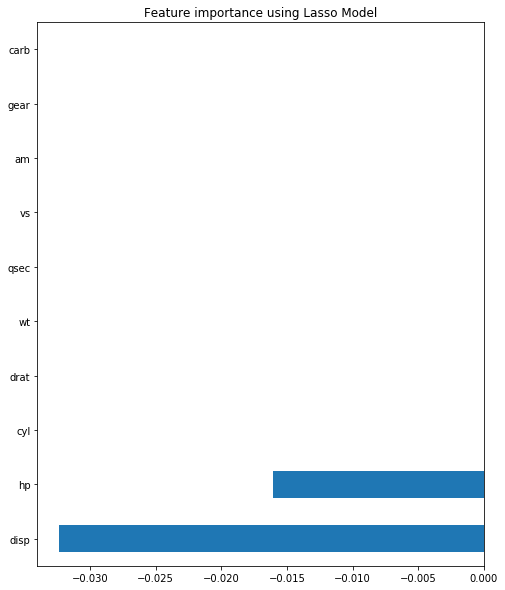

In [29]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

### Extra

##### Feature Selection on the basis of vif and standardised residual concept.

In [30]:
## Building of simple OLS model.
X = df[['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']]
y = df.mpg
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Fri, 16 Aug 2019   Prob (F-statistic):           3.79e-07
Time:                        13:19:20   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3034     18.718      0.657      0.518     -26.623      51.229
cyl           -0.1114      1.045     -0.107      0.916      -2.285       2.062
disp           0.0133      0.018      0.747      0.463      -0.024       0.050
hp            -0.0215      0.022     -0.987      0.335      -0.067       0.024
drat           0.7871      1.635      0.481      0.635      -2.614       4.188
wt            -3.7153      1.894     -1.961      0.063      -7.655       0.224
qsec           0.8210      0.731      1.123      0.274      -0.699       2.341
vs             0.3178      2.105      0.151      0.881      -4.059       4.694
am             2.5202      2.057      1.225      0.234      -1.757       6.797
gear           0.6554      1.493      0.439      0.665      -2.450       3.761
carb          -0.1994      0.829     -0.241      0.812      -1.923       1.524
==============================================================================
Omnibus:                        1.907   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.747
Skew:                           0.521   Prob(JB):                        0.418
Kurtosis:                       2.526   Cond. No.                     1.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
### calculating the vif values as multicollinearity exists (as stated by warning 2)

from statsmodels.stats.outliers_influence import variance_inflation_factor

[variance_inflation_factor(X.values, j) for j in range(1, X.shape[1])]

[98.93079080232437,
 56.047780574327106,
 132.21435319153656,
 182.94804892931742,
 317.5343763853064,
 8.752581047798778,
 7.4120195528104285,
 119.80487876498725,
 32.213836113817116]

In [32]:
# removing collinear variables
# function definition

def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

In [33]:
## passing X to the function so that the multicollinearity gets removed.
train_out = calculate_vif(X)

Iteration no.
1
[112.62982779028376, 98.93079080232437, 56.047780574327106, 132.21435319153656, 182.94804892931742, 317.5343763853064, 8.752581047798778, 7.4120195528104285, 119.80487876498725, 32.213836113817116]
Max VIF is for variable no.:
5
Iteration no.
2
[82.35453610136648, 80.90073004637507, 55.580065574175435, 98.9271196525115, 95.56121811810301, 6.8735504143211354, 7.234123824175732, 100.71027610040106, 21.84015584783301]
Max VIF is for variable no.:
7
Iteration no.
3
[81.2702733119184, 80.21029286131379, 55.03101162645057, 59.87727217382084, 95.26465869214627, 6.491650449889378, 5.847619985268266, 20.47633202797162]
Max VIF is for variable no.:
4
Iteration no.
4
[77.7369646371158, 37.78801631145948, 44.89371954354733, 54.87258386660498, 5.4288647677534625, 5.230633425049231, 13.768474487262548]
Max VIF is for variable no.:
0
Iteration no.
5
[27.916047152584948, 41.78603746657891, 29.900961861836688, 4.933343395628271, 4.634701624890053, 13.763708254603651]
Max VIF is for vari

In [34]:
## includes only the relevant features.
train_out.head()

,disp,vs,am
model,,,
Mazda RX4,160.0,0,1
Mazda RX4 Wag,160.0,0,1
Datsun 710,108.0,1,1
Hornet 4 Drive,258.0,1,0
Hornet Sportabout,360.0,0,0


#### By this method we got that disp, vs and am are the most important features.